In [112]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from ZUNet_v1 import ZUNet_v1, ZUNet_v2
from UNet import UNet
from dataloader import *
import torch
import nibabel as nib
import ttach as tta
import wandb
from engine import *

from sklearn import model_selection

import segmentation_models_pytorch as smp

import cv2
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops

import SimpleITK as sitk
sitk.ProcessObject_SetGlobalWarningDisplay(False)

def plot_pmap(p_map, z=20):
    fig, axs = plt.subplots(1,3, figsize=(15,12))
    im1 = axs[0].imshow(p_map[:,:,z,0])
    fig.colorbar(im1, ax=axs[0], shrink=0.3)
    im2 = axs[1].imshow(p_map[:,:,z,1])
    fig.colorbar(im1, ax=axs[1], shrink=0.3)
    im3 = axs[2].imshow(p_map[:,:,z,2])
    fig.colorbar(im1, ax=axs[2], shrink=0.3)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
def get_config():
    config = wandb.config
    # ENV
    debug = True
    if debug:
        config.epochs = 1
        config.n_case = 5
    else:
        config.epochs = 10
        # n_case = 0 to run all cases
        config.n_case = 0
    config.debug = debug
    config.data_path = os.getenv("VIDA_PATH")
    config.data_path = '/data4/inqlee0704'
    config.in_file = "ENV18PM_ProjSubjList_sillicosis.in"
    config.in_file_valid = "ENV18PM_ProjSubjList_sillicosis_valid.in"
    # config.in_file = "ENV18PM_ProjSubjList_cleaned_IN.in"
    config.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # config.mask = 'airway'
    config.mask = "lung"
    config.model = "ZUNet"
    config.bce_weight = 0.5

    config.learning_rate = 0.0001
    config.train_bs = 8
    config.valid_bs = 16
    config.aug = True
    config.Z = False
    config.num_c = 3

    return config

In [114]:
c = get_config()
df = pd.read_csv(os.path.join(c.data_path, c.in_file), sep="\t")
infer_path = "data/ProjSubjList.in"
parameter_path = "/data1/inqlee0704/silicosis/RESULTS/UNet_lung_multiclass_20211125/UNet_lung_multiclass_15.pth"
infer_list = pd.read_csv(infer_path)
DEVICE = "cuda"
# model = ZUNet_v1(in_channels=3)
model = UNet(in_channel=1,num_c=c.num_c)
model.load_state_dict(torch.load(parameter_path))
model.to(DEVICE)
model.eval()

test_data = TE_loader(infer_list, multi_c=False)


Loading Data. . . 


In [115]:
temp_img = test_data[0]['image']
eng = Segmentor(
    model=model
)

In [116]:
p_map = eng.inference_pmap(temp_img,n_class=3)

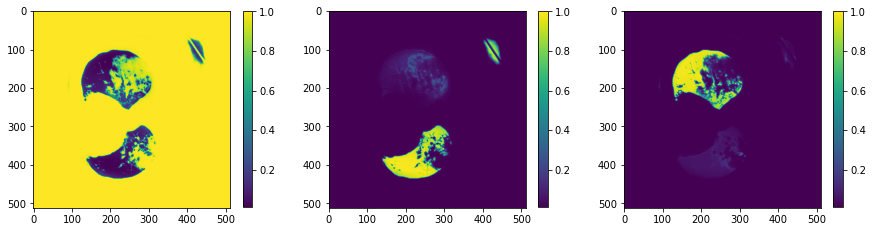

In [117]:
plot_pmap(p_map,z=30)

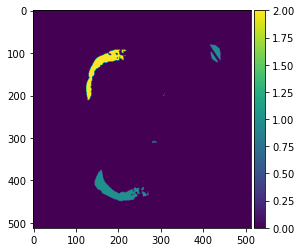

In [118]:

ax = plt.subplot()
im = ax.imshow(pred_volume[:,:,20])

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

# ZUNET

In [126]:
c = get_config()
df = pd.read_csv(os.path.join(c.data_path, c.in_file), sep="\t")
infer_path = "data/ProjSubjList.in"
parameter_path = "/data1/inqlee0704/silicosis/RESULTS/ZUNet_lung_multiclass_20211203/ZUNet_lung_multiclass_5.pth"
infer_list = pd.read_csv(infer_path)
DEVICE = "cuda"
model = ZUNet_v1(in_channels=1, num_c = c.num_c)
# model = UNet(in_channel=1,num_c=c.num_c)
model.load_state_dict(torch.load(parameter_path))
model.to(DEVICE)
model.eval()

test_data = TE_loader(infer_list, multi_c=False)


Loading Data. . . 


In [127]:
temp_img = test_data[0]['image']
eng = Segmentor_Z(
    model=model
)
p_map_z = eng.inference_pmap(temp_img,n_class=3)

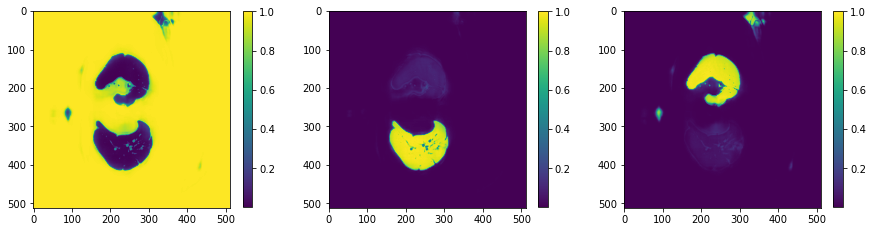

In [125]:
plot_pmap(p_map_z,z=50)

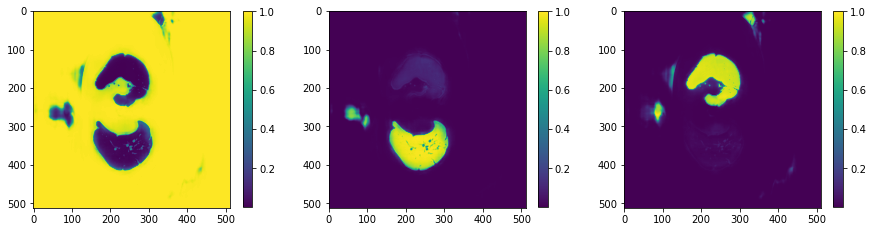

In [121]:
plot_pmap(p_map_z,z=50)

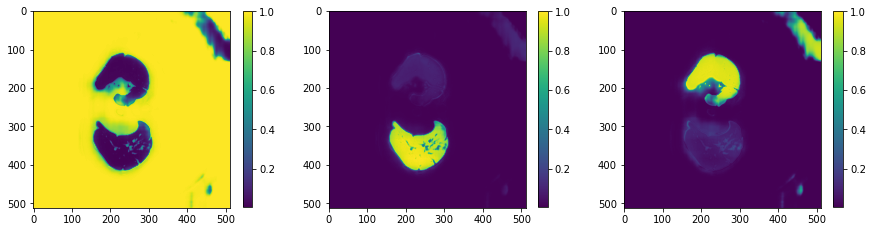

In [128]:
plot_pmap(p_map_z,z=50)

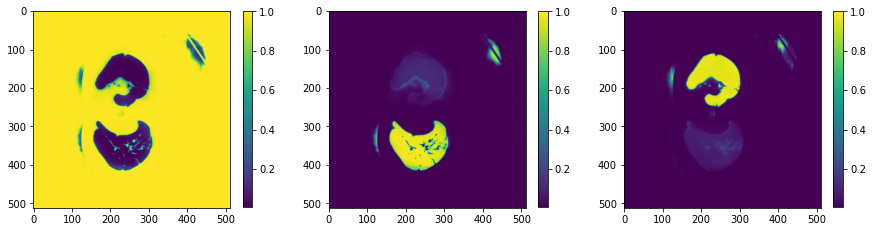

In [122]:
plot_pmap(p_map,z=50)